## **实验1002：KMeans聚类**

### **提出问题**
对于给定了Label的训练数据，可以使用KNN来分类，但是对于没有给定Label的训练数据，如何根据其中的Feature，对数据进行分类，使分类下的样本数据看上去比较接近呢？

### **分析问题**
* 监督学习和无监督学习
 * 以往的回归、朴素贝叶斯、SVM等都是有类别标签$y$的，也就是说样例中已经给出了样例的分类。这类机器学习称为监督学习
 * 而聚类的样本中却没有给定$y$，只有特征$x$；其目的是找到每个样本$x$潜在的类别$y$，并将同类别$y$的样本$x$放在一起
* K-Means算法
 * 计算过程
    1. 估计样本中的总分类个数$K$
    2. 随机选取K个聚类质心点$\mu_1,\mu_2,\cdots,\mu_k $
    3. 对于每一个样本，分别计算到每个质心点的距离$ d_1,d_2,\cdots,d_k$，取最近的一个距离，作为该样本暂时所属的分类k。可以选择euclidean距离作为参考依据。至此，每个样本都归入某个类别下
    4. 对于每个类别，计算其所辖的每个样本到其质心的距离之和，作为累积距离偏差$W_k$
    5. 针对每个类别，重新计算质心：$\mu_k=\dfrac{\sum_{i=1}^{N_k} x_i}{N_k}$，其中，$N_k$表示当前该类别下的样本数量
    6. 利用新的质心，再次计算累积距离偏差$W_k'$
    7. 对于两次计算出的$W_k$，如果其差值小于指定的误差限(例如0.00001)，则可认为已经收敛；否则再次进行步骤5)和6)

 * 算法的优缺点
   * 算法简单，易于实现
   * 初始质心选择很重要，有可能会导致找不到全局收敛解(只找到局部收敛解)；但是又没有什么好的办法来优化质心的选择
   * K值的选取也很重要。K值越大，对训练数据的分类将很好，但有可能造成overfit。也并没有太好的办法确定K值

### **案例1：自行实现K-Means算法**

经过 7 次循环，质心计算完成...


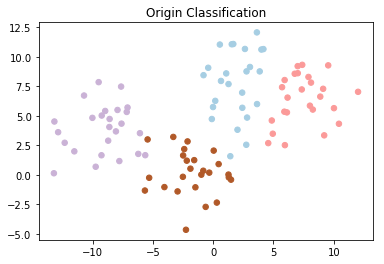

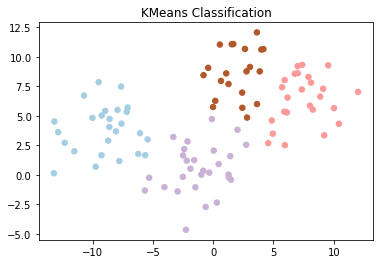

In [1]:
''' 自定义k-means算法实现对数据分类 '''

%matplotlib inline

import numpy as np 
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# 计算两点之间距离
def distance(pt1, pt2):
    return np.sum((pt1 - pt2) ** 2)

# 计算当前各个中心点中离给定点pt最近的一个
def classify(pt, centers):
    temp = [distance(pt, centers[i]) for i in range(len(centers))]
    index = np.argmin(temp)
    dist = temp[index]
    return (index, dist)

# 将每个点归入到离它最近的中心点类别下
def re_category(X, categories, centers):
    for category in categories:
        category.clear()
    newcost = 0.0
    for pt in X:                                
        index, dist = classify(pt, centers)
        categories[index].append(pt)            # 将pt纳入离它最近的中心点类别下
        newcost += dist
    return newcost / M    # 计算每个点到离它最近的中心点的平均距离

# 根据当前的类别划分，重新计算每个类别下新的中心点
def calc_centers(categories, centers):
    for i in range(len(categories)):
        # categorise[i]中的每行数据有两列，分别代表横坐标和纵坐标，因此按列求平均值，就可得出新的质心横坐标和纵坐标
        centers[i] = np.mean(categories[i], 0)  

M = 100
K = 4
# 围绕K个中心点，生成M个随机二维数据点
X, y = make_blobs(n_samples=M, centers=K, cluster_std=2.0, random_state=20)
cost = 1e10             # 初始误差，设置为很大
epsilon = 1e-8
max_iter = 100
categories = [[] for i in range(K)]

# 随机选择K个中心点作为初始点
init_indecies = np.random.randint(0, M, K)
centers = X[init_indecies]
# 计算分类
newcost = re_category(X, categories, centers)
iter = 0
while iter < max_iter:
    iter += 1
    if np.abs(newcost - cost) > epsilon :
        cost = newcost
        # 重新计算各类中心点
        calc_centers(categories, centers)
        # 再次计算
        newcost = re_category(X, categories, centers)
    else:
        break

print("经过",iter,"次循环，质心计算完成...")

yPredicts = np.zeros(M)
# 计算每个样本所属的类别
for i in np.arange(M):
    category, _ = classify(X[i], centers)
    yPredicts[i] = category

# 查看原始分类情况
plt.figure(1)
plt.title("Origin Classification")
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# 查看K-Means分类结果
plt.figure(2)
plt.title("KMeans Classification")
plt.scatter(X[:, 0], X[:, 1], c=yPredicts, s=30, cmap=plt.cm.Paired)
plt.show()

### **案例2：使用sklearn.cluster.KMeans**

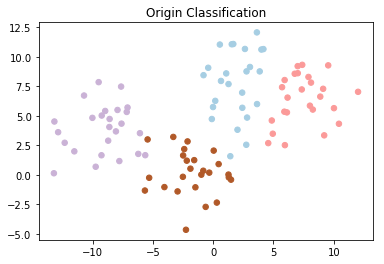

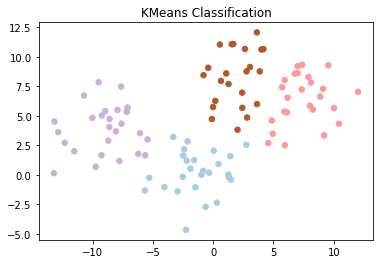

In [2]:
''' 使用KMeans实现聚类 '''

import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn import cluster

M = 100
K = 4
X, y = make_blobs(n_samples=M, centers=K, cluster_std=2.0, random_state=20)

k_means = cluster.KMeans(n_clusters=K)
k_means.fit(X)
yPredicts = k_means.predict(X)

# 查看原始分类情况
plt.figure(1)
plt.title("Origin Classification")
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# 查看K-Means分类结果
plt.figure(2)
plt.title("KMeans Classification")
plt.scatter(X[:, 0], X[:, 1], c=yPredicts, s=30, cmap=plt.cm.Paired)
plt.show()